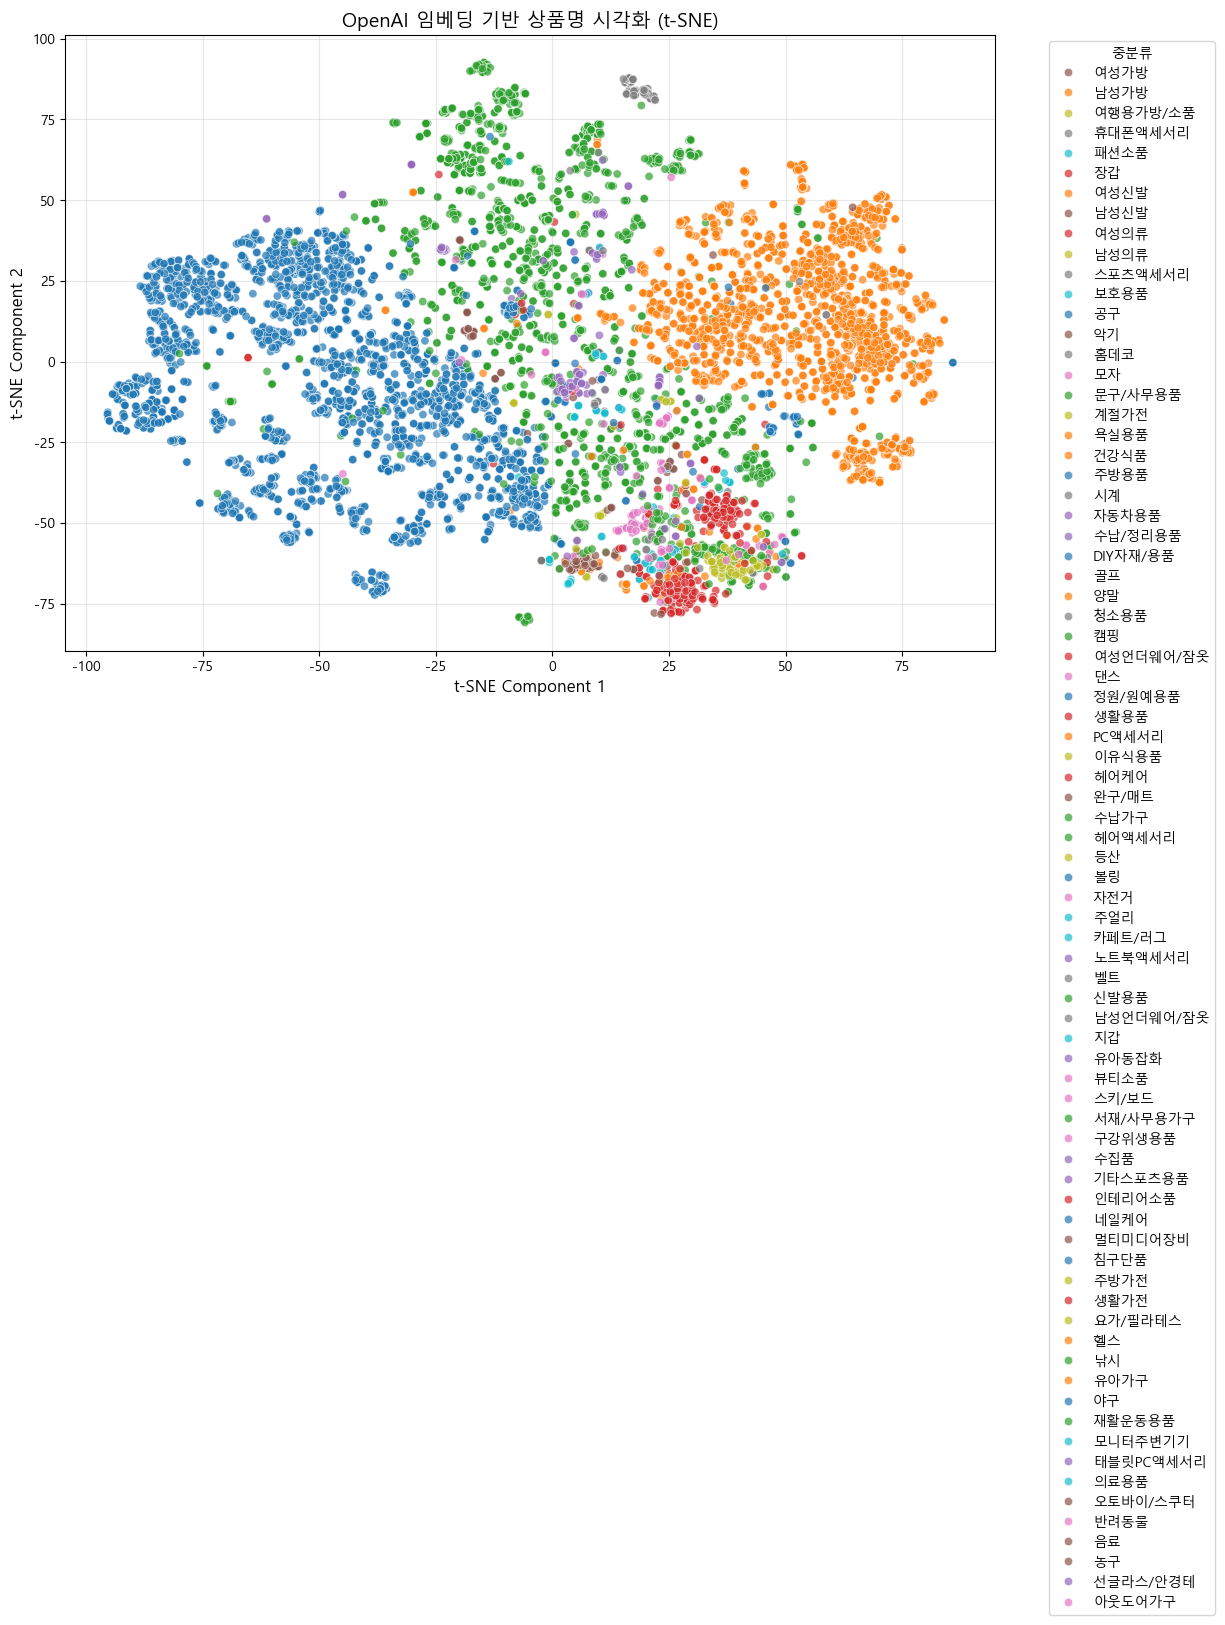

In [64]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from dotenv import load_dotenv
from langchain_openai import OpenAIEmbeddings


# OpenAI ÏûÑÎ≤†Îî© Î™®Îç∏ + t-SNEÎ•º ÌôúÏö©Ìïú Ï∞®Ïõê Ï∂ïÏÜå + Ïã§Î£®Ïó£ Í≥ÑÏàò Í≥ÑÏÇ∞
# ‚úÖ ÌôòÍ≤Ω Î≥ÄÏàò Î°úÎìú

load_dotenv()
API_KEY = os.getenv('OPENAI_API_KEY')

# ‚úÖ ÏóëÏÖÄ ÌååÏùº Î°úÎìú
file_path = "db/Ïò§ÎÑàÌÅ¥Îûú_ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ_0203.xlsx"
df = pd.read_excel(file_path)

# ‚úÖ 'Ïπ¥ÌÖåÍ≥†Î¶¨Î™Ö'ÏóêÏÑú Ï§ëÎ∂ÑÎ•ò Ï∂îÏ∂ú
df['Ï§ëÎ∂ÑÎ•ò'] = df['Ïπ¥ÌÖåÍ≥†Î¶¨Î™Ö'].str.split('>').str[1]

# ‚úÖ Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÏÉâÏÉÅ Îß§Ìïë
category_counts = df['Ï§ëÎ∂ÑÎ•ò'].value_counts()
unique_categories = category_counts.index
palette = sns.color_palette("tab10", len(unique_categories))
category_colors = {category: palette[i] for i, category in enumerate(unique_categories)}
df['ÏÉâÏÉÅ'] = df['Ï§ëÎ∂ÑÎ•ò'].map(category_colors)

# ‚úÖ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Windows: Malgun Gothic, macOS: AppleGothic)
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False  # ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ

# ‚úÖ OpenAI ÏûÑÎ≤†Îî© Í∞ùÏ≤¥ ÏÉùÏÑ±
embeddings_model = OpenAIEmbeddings(model="text-embedding-ada-002", openai_api_key=API_KEY)

# ‚úÖ ÏõêÎ≥∏ÏÉÅÌíàÎ™Ö Î≤°ÌÑ∞Ìôî Ìï®Ïàò
def get_embedding(text):
    """
    OpenAIÏùò text-embedding-ada-002 Î™®Îç∏ÏùÑ Ïù¥Ïö©ÌïòÏó¨ ÌÖçÏä§Ìä∏Î•º Î≤°ÌÑ∞ÌôîÌï©ÎãàÎã§.
    Î≤°ÌÑ∞Îäî 1536Ï∞®ÏõêÏùò Í≥†Ïú†Ìïú ÏàòÏπò ÌëúÌòÑÏúºÎ°ú Î≥ÄÌôòÎêòÎ©∞, Ïù¥Î•º ÌôúÏö©ÌïòÏó¨ ÏÉÅÌíàÎ™Ö Í∞ÑÏùò ÏùòÎØ∏Ï†Å Ïú†ÏÇ¨ÏÑ±ÏùÑ Î∂ÑÏÑùÌï† Ïàò ÏûàÏäµÎãàÎã§.
    """
    return embeddings_model.embed_documents(text)

# ‚úÖ Ïó¨Îü¨ Í∞úÏùò ÌÖçÏä§Ìä∏Î•º Ìïú Î≤àÏóê ÏûÑÎ≤†Îî©
df['embedding'] = get_embedding(df['ÏõêÎ≥∏ÏÉÅÌíàÎ™Ö'].dropna().tolist())

# ‚úÖ ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Î•º NumPy Î∞∞Ïó¥Î°ú Î≥ÄÌôò
embeddings_matrix = np.array(df['embedding'].tolist())

# ‚úÖ t-SNEÎ•º ÌôúÏö©Ìïú Ï∞®Ïõê Ï∂ïÏÜå (2D ÏãúÍ∞ÅÌôî)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
df[['TSNE1', 'TSNE2']] = tsne.fit_transform(embeddings_matrix)

# ‚úÖ ÏãúÍ∞ÅÌôî - Í∞ôÏùÄ Ïπ¥ÌÖåÍ≥†Î¶¨ÎÅºÎ¶¨ Î™®Ïù¥ÎäîÏßÄ ÌôïÏù∏
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='TSNE1', y='TSNE2', hue='Ï§ëÎ∂ÑÎ•ò', palette=category_colors, alpha=0.7)

# ‚úÖ Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
plt.title("OpenAI ÏûÑÎ≤†Îî© Í∏∞Î∞ò ÏÉÅÌíàÎ™Ö ÏãúÍ∞ÅÌôî (t-SNE)", fontsize=14)
plt.xlabel("t-SNE Component 1", fontsize=12)
plt.ylabel("t-SNE Component 2", fontsize=12)
plt.legend(title="Ï§ëÎ∂ÑÎ•ò", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()


üìä ÌèâÍ∑† Ïã§Î£®Ïó£ Í≥ÑÏàò: -0.5029


C:\Users\sylee\AppData\Local\Temp\ipykernel_36664\3382170875.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Ï§ëÎ∂ÑÎ•ò'], y=df['Silhouette'], palette="viridis")


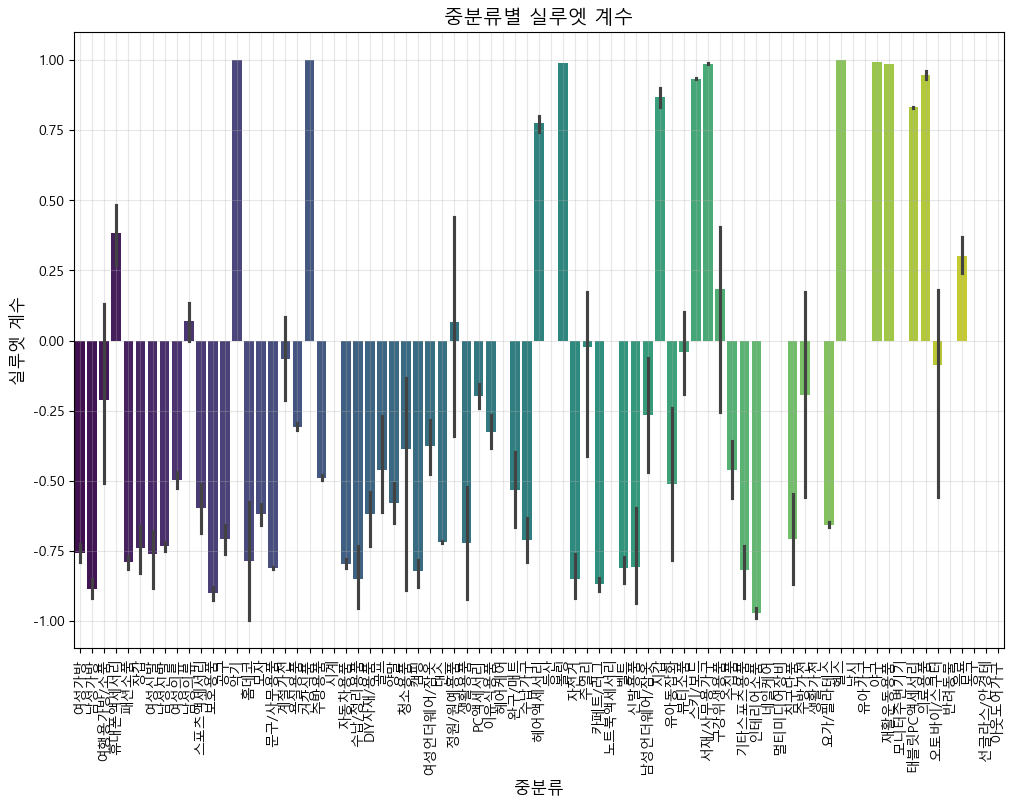

In [65]:
from sklearn.metrics import silhouette_samples, silhouette_score


# ‚úÖ Ïã§Î£®Ïó£ Í≥ÑÏàò Í≥ÑÏÇ∞
silhouette_avg = silhouette_score(df[['TSNE1', 'TSNE2']], df['Ï§ëÎ∂ÑÎ•ò'].factorize()[0])  # Ï§ëÎ∂ÑÎ•ò Í∏∞Ï§ÄÏúºÎ°ú Í≥ÑÏÇ∞
df['Silhouette'] = silhouette_samples(df[['TSNE1', 'TSNE2']], df['Ï§ëÎ∂ÑÎ•ò'].factorize()[0])

print(f"üìä ÌèâÍ∑† Ïã§Î£®Ïó£ Í≥ÑÏàò: {silhouette_avg:.4f}")

# ‚úÖ ÏãúÍ∞ÅÌôî - Ïã§Î£®Ïó£ Í≥ÑÏàò Î∂ÑÌè¨
plt.figure(figsize=(12, 8))
sns.barplot(x=df['Ï§ëÎ∂ÑÎ•ò'], y=df['Silhouette'], palette="viridis")
plt.xticks(rotation=90)  # XÏ∂ï ÎùºÎ≤® ÌöåÏ†Ñ
plt.title("Ï§ëÎ∂ÑÎ•òÎ≥Ñ Ïã§Î£®Ïó£ Í≥ÑÏàò", fontsize=14)
plt.xlabel("Ï§ëÎ∂ÑÎ•ò", fontsize=12)
plt.ylabel("Ïã§Î£®Ïó£ Í≥ÑÏàò", fontsize=12)
plt.grid(alpha=0.3)
plt.show()


In [66]:
# ‚úÖ "ÏïÖÍ∏∞" Í¥ÄÎ†® ÏÉÅÌíà ÌïÑÌÑ∞ÎßÅ
instrument_categories = df[df['Ï§ëÎ∂ÑÎ•ò'].str.contains("ÏïÖÍ∏∞", na=False, case=False)]  # "ÏïÖÍ∏∞" Ìè¨Ìï®Îêú Ï§ëÎ∂ÑÎ•òÎßå ÏÑ†ÌÉù

# ‚úÖ Ï§ëÎ∂ÑÎ•òÎ≥Ñ Í∞úÏàò Í≥ÑÏÇ∞
instrument_counts = instrument_categories['Ï§ëÎ∂ÑÎ•ò'].value_counts()

# ‚úÖ Í≤∞Í≥º Ï∂úÎ†•
print(instrument_counts)

Ï§ëÎ∂ÑÎ•ò
ÏïÖÍ∏∞    2
Name: count, dtype: int64
